In [5]:
import numpy as np
import seaborn as sns
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt 

In [6]:
from sklearn import preprocessing
from sklearn import linear_model

In [7]:
import os

In [8]:
SMC=pd.read_excel("SMCdata.xlsx", index_col ="Date ") 
SMC.head()

Adj Close_S_BAC  Volume_S_BAC  Adj Close_S_UAL  Volume_S_UAL  \
Date                                                                       
2016-01-04        14.983289   114888000.0        55.610001     5693200.0   
2016-01-05        14.983289    66670000.0        55.060001     6982900.0   
2016-01-06        14.664108   102760800.0        55.200001     4902100.0   
2016-01-07        14.135177   116255900.0        52.630001     6095600.0   
2016-01-08        13.861594   124782400.0        51.889999     6365600.0   

            Adj Close_S_F  Volume_S_F  Adj Close_S_VXRT  Volume_S_VXRT  \
Date                                                                     
2016-01-04      11.050024  38618500.0         21.780001         7300.0   
2016-01-05      10.852281  50267500.0         23.980000        19500.0   
2016-01-06      10.369781  61285500.0         22.990000         3100.0   
2016-01-07      10.045479  57846700.0         22.000000        14100.0   
2016-01-08       9.918921  46199400.0         22.440001         3100.0   

            Adj Close_M_FAGNX  Adj Close_M_UMPIX  Adj Close_M_RMBNX.  \
Date                                                                   
2016-01-04          26.977783          24.412767           24.917059   
2016-01-05          26.987497          24.451048           25.001209   
2016-01-06          25.821732          23.755636           24.933889   
2016-01-07          25.199989          22.549831           24.588871   
2016-01-08          25.034840          21.940548           24.311172   

            Adj Close_M_HSFNX  Adj Close_C_LTC-USD  Volume_C_LTC-USD  \
Date                                                                   
2016-01-04          15.922103              3.49539         3309740.0   
2016-01-05          15.981263              3.46967         2104650.0   
2016-01-06          15.944286              3.45356         2208860.0   
2016-01-07          15.626288              3.60414         4560680.0   
2016-01-08          15.419223              3.56888         3277990.0   

            Adj Close_C_USDT-USD  Volume_C_USDT-USD  Adj Close_C_ETH-USD  \
Date                                                                       
2016-01-04               1.00000            81181.0             0.954480   
2016-01-05               1.00025             1350.0             0.950176   
2016-01-06               1.00000           541019.0             0.950860   
2016-01-07               1.00000            25544.0             0.942005   
2016-01-08               1.00000            13419.0             0.986789   

            Volume_C_ETH-USD  Adj Close_C_BTC-USD  Volume_C_BTC-USD  
Date                                                                 
2016-01-04          346245.0           433.091003        38477500.0  
2016-01-05          219833.0           431.959991        34522600.0  
2016-01-06          308791.0           429.105011        34042500.0  
2016-01-07          647462.0           458.048004        87562200.0  
2016-01-08          545600.0           453.230011        56993000.0

In [9]:
SMC.describe() 

Adj Close_S_BAC  Volume_S_BAC  Adj Close_S_UAL  Volume_S_UAL  \
count      1206.000000  1.206000e+03      1206.000000  1.206000e+03   
mean         23.871322  7.634953e+07        66.825257  9.330326e+06   
std           5.971277  3.811482e+07        18.855986  1.627280e+07   
min          10.177327  1.380540e+07        19.920000  7.711000e+05   
25%          21.295769  5.165975e+07        53.170000  2.662350e+06   
50%          25.085258  6.633740e+07        69.825001  3.870250e+06   
75%          28.248196  9.039810e+07        82.925001  5.900000e+06   
max          34.925472  3.750887e+08        96.699997  1.428128e+08   

       Adj Close_S_F    Volume_S_F  Adj Close_S_VXRT  Volume_S_VXRT  \
count    1206.000000  1.206000e+03       1206.000000   1.205000e+03   
mean        9.124454  4.563816e+07          6.810307   3.065378e+06   
std         1.475197  2.505582e+07          5.797835   1.396336e+07   
min         4.010000  9.549600e+06          0.280000   0.000000e+00   
25%         8.488879  2.920822e+07          2.050000   7.900000e+03   
50%         9.456491  3.871400e+07          5.550000   3.020000e+04   
75%        10.165261  5.393252e+07          9.240000   2.157000e+05   
max        11.530882  2.318008e+08         23.980000   2.306190e+08   

       Adj Close_M_FAGNX  Adj Close_M_UMPIX  Adj Close_M_RMBNX.  \
count        1206.000000        1205.000000         1205.000000   
mean           29.092292          37.100226           31.668425   
std             6.011265           7.295177            5.462887   
min            10.740000          14.940000           18.299999   
25%            26.706099          31.139999           25.968945   
50%            30.101065          38.319065           33.056778   
75%            32.942623          42.600685           35.750484   
max            39.007904          49.000000           40.733868   

       Adj Close_M_HSFNX  Adj Close_C_LTC-USD  Volume_C_LTC-USD  \
count        1205.000000          1746.000000      1.746000e+03   
mean           19.360582            56.237200      1.275277e+09   
std             2.781984            54.618925      1.582551e+09   
min            11.700000             2.996780      5.074800e+05   
25%            16.802147             4.825775      1.298912e+07   
50%            20.211456            47.277792      4.066765e+08   
75%            21.489813            71.231148      2.426391e+09   
max            23.721529           358.335999      7.552238e+09   

       Adj Close_C_USDT-USD  Volume_C_USDT-USD  Adj Close_C_ETH-USD  \
count           1746.000000       1.746000e+03          1746.000000   
mean               1.001172       1.104634e+10           229.207486   
std                0.009697       1.631284e+10           227.927546   
min                0.913595       1.350000e+03             0.942005   
25%                0.999997       1.383802e+07            34.384124   
50%                1.000234       2.596860e+09           185.956238   
75%                1.003394       1.902137e+10           299.228493   
max                1.077880       9.931533e+10          1396.420044   

       Volume_C_ETH-USD  Adj Close_C_BTC-USD  Volume_C_BTC-USD  
count      1.746000e+03          1746.000000      1.746000e+03  
mean       4.378473e+09          5615.709636      1.035235e+10  
std        5.544431e+09          4009.375173      1.240225e+10  
min        2.198330e+05           364.330994      2.851400e+07  
25%        7.466655e+07          1145.379975      2.869127e+08  
50%        1.871685e+09          6278.660156      5.024519e+09  
75%        7.201211e+09          8825.954101      1.713057e+10  
max        3.142113e+10         19497.400390      7.415677e+10

In [10]:
SMC.columns

Index(['Adj Close_S_BAC', 'Volume_S_BAC', 'Adj Close_S_UAL', 'Volume_S_UAL',
       'Adj Close_S_F', 'Volume_S_F', 'Adj Close_S_VXRT', 'Volume_S_VXRT',
       'Adj Close_M_FAGNX', 'Adj Close_M_UMPIX', 'Adj Close_M_RMBNX.',
       'Adj Close_M_HSFNX', 'Adj Close_C_LTC-USD', 'Volume_C_LTC-USD',
       'Adj Close_C_USDT-USD', 'Volume_C_USDT-USD', 'Adj Close_C_ETH-USD',
       'Volume_C_ETH-USD', 'Adj Close_C_BTC-USD', 'Volume_C_BTC-USD'],
      dtype='object')

In [12]:
SMC.isnull()

Adj Close_S_BAC  Volume_S_BAC  Adj Close_S_UAL  Volume_S_UAL  \
Date                                                                       
2016-01-04            False         False            False         False   
2016-01-05            False         False            False         False   
2016-01-06            False         False            False         False   
2016-01-07            False         False            False         False   
2016-01-08            False         False            False         False   
...                     ...           ...              ...           ...   
2020-10-11             True          True             True          True   
2020-10-12            False         False            False         False   
2020-10-13            False         False            False         False   
2020-10-14            False         False            False         False   
2020-10-15            False         False            False         False   

            Adj Close_S_F  Volume_S_F  Adj Close_S_VXRT  Volume_S_VXRT  \
Date                                                                     
2016-01-04          False       False             False          False   
2016-01-05          False       False             False          False   
2016-01-06          False       False             False          False   
2016-01-07          False       False             False          False   
2016-01-08          False       False             False          False   
...                   ...         ...               ...            ...   
2020-10-11           True        True              True           True   
2020-10-12          False       False             False          False   
2020-10-13          False       False             False          False   
2020-10-14          False       False             False          False   
2020-10-15          False       False             False          False   

            Adj Close_M_FAGNX  Adj Close_M_UMPIX  Adj Close_M_RMBNX.  \
Date                                                                   
2016-01-04              False              False               False   
2016-01-05              False              False               False   
2016-01-06              False              False               False   
2016-01-07              False              False               False   
2016-01-08              False              False               False   
...                       ...                ...                 ...   
2020-10-11               True               True                True   
2020-10-12              False              False               False   
2020-10-13              False              False               False   
2020-10-14              False              False               False   
2020-10-15              False               True                True   

            Adj Close_M_HSFNX  Adj Close_C_LTC-USD  Volume_C_LTC-USD  \
Date                                                                   
2016-01-04              False                False             False   
2016-01-05              False                False             False   
2016-01-06              False                False             False   
2016-01-07              False                False             False   
2016-01-08              False                False             False   
...                       ...                  ...               ...   
2020-10-11               True                False             False   
2020-10-12              False                False             False   
2020-10-13              False                False             False   
2020-10-14              False                False             False   
2020-10-15               True                 True              True   

            Adj Close_C_USDT-USD  Volume_C_USDT-USD  Adj Close_C_ETH-USD  \
Date                                                                       
2016-01-04                 False  

In [13]:
SMC["Adj Close_S_BAC"].isnull().sum()

541

In [14]:
SMC['Adj Close_S_BAC']=SMC['Adj Close_S_BAC'].fillna(SMC['Adj Close_S_BAC'].mean())   
SMC['Volume_S_BAC']=SMC['Volume_S_BAC'].fillna(SMC['Volume_S_BAC'].mean())  
SMC['Adj Close_S_UAL']=SMC['Adj Close_S_UAL'].fillna(SMC['Adj Close_S_UAL'].mean())  
SMC['Volume_S_UAL']=SMC['Volume_S_UAL'].fillna(SMC['Volume_S_UAL'].mean())  
SMC[ 'Adj Close_S_F']=SMC[ 'Adj Close_S_F'].fillna(SMC[ 'Adj Close_S_F'].mean())  
SMC['Volume_S_F']=SMC['Volume_S_F'].fillna(SMC['Volume_S_F'].mean())  
SMC['Adj Close_S_VXRT']= SMC['Adj Close_S_VXRT'].fillna(SMC['Adj Close_S_VXRT'].mean())
SMC['Volume_S_VXRT']=SMC['Volume_S_VXRT'].fillna(SMC['Volume_S_VXRT'].mean())
SMC['Adj Close_M_FAGNX']=SMC['Adj Close_M_FAGNX'].fillna(SMC['Adj Close_M_FAGNX'].mean())
SMC['Adj Close_M_UMPIX']=SMC['Adj Close_M_UMPIX'].fillna(SMC['Adj Close_M_UMPIX'].mean())
SMC['Adj Close_M_RMBNX.']=SMC['Adj Close_M_RMBNX.'].fillna(SMC['Adj Close_M_RMBNX.'].mean())
SMC['Adj Close_M_HSFNX']=SMC['Adj Close_M_HSFNX'].fillna(SMC['Adj Close_M_HSFNX'].mean())
SMC['Adj Close_C_LTC-USD']=SMC['Adj Close_C_LTC-USD'].fillna(SMC['Adj Close_C_LTC-USD'].mean())
SMC['Volume_C_LTC-USD']=SMC['Volume_C_LTC-USD'].fillna(SMC['Volume_C_LTC-USD'].mean())
SMC['Adj Close_C_USDT-USD']=SMC['Adj Close_C_USDT-USD'].fillna(SMC['Adj Close_C_USDT-USD'].mean())
SMC['Volume_C_USDT-USD']=SMC['Volume_C_USDT-USD'].fillna(SMC['Volume_C_USDT-USD'].mean())
SMC[ 'Adj Close_C_ETH-USD']=SMC[ 'Adj Close_C_ETH-USD'].fillna(SMC[ 'Adj Close_C_ETH-USD'].mean())
SMC['Volume_C_ETH-USD']=SMC['Volume_C_ETH-USD'].fillna(SMC['Volume_C_ETH-USD'].mean())
SMC['Adj Close_C_BTC-USD']=SMC['Adj Close_C_BTC-USD'].fillna(SMC['Adj Close_C_BTC-USD'].mean())
SMC['Volume_C_BTC-USD']=SMC['Volume_C_BTC-USD'].fillna(SMC['Volume_C_BTC-USD'].mean())

In [15]:
SMC.shape

(1747, 20)

In [17]:
SMC.describe()

Adj Close_S_BAC  Volume_S_BAC  Adj Close_S_UAL  Volume_S_UAL  \
count      1747.000000  1.747000e+03      1747.000000  1.747000e+03   
mean         23.871322  7.634953e+07        66.825257  9.330326e+06   
std           4.960651  3.166396e+07        15.664649  1.351866e+07   
min          10.177327  1.380540e+07        19.920000  7.711000e+05   
25%          22.759418  5.833420e+07        62.710001  3.185800e+06   
50%          23.871322  7.634953e+07        66.825257  5.576300e+06   
75%          27.194685  7.855825e+07        77.165001  9.330326e+06   
max          34.925472  3.750887e+08        96.699997  1.428128e+08   

       Adj Close_S_F    Volume_S_F  Adj Close_S_VXRT  Volume_S_VXRT  \
count    1747.000000  1.747000e+03       1747.000000   1.747000e+03   
mean        9.124454  4.563816e+07          6.810307   3.065378e+06   
std         1.225523  2.081517e+07          4.816563   1.159528e+07   
min         4.010000  9.549600e+06          0.280000   0.000000e+00   
25%         8.982714  3.327785e+07          3.040000   1.505000e+04   
50%         9.124454  4.563816e+07          6.810307   1.842000e+05   
75%         9.838356  4.563816e+07          6.820000   3.065378e+06   
max        11.530882  2.318008e+08         23.980000   2.306190e+08   

       Adj Close_M_FAGNX  Adj Close_M_UMPIX  Adj Close_M_RMBNX.  \
count        1747.000000        1747.000000         1747.000000   
mean           29.092292          37.100226           31.668425   
std             4.993871           6.057968            4.536421   
min            10.740000          14.940000           18.299999   
25%            28.424553          35.911503           31.668425   
50%            29.092292          37.100226           31.668425   
75%            31.691730          40.985562           34.084537   
max            39.007904          49.000000           40.733868   

       Adj Close_M_HSFNX  Adj Close_C_LTC-USD  Volume_C_LTC-USD  \
count        1747.000000          1747.000000      1.747000e+03   
mean           19.360582            56.237200      1.275277e+09   
std             2.310179            54.603282      1.582098e+09   
min            11.700000             2.996780      5.074800e+05   
25%            19.360582             4.829800      1.322305e+07   
50%            19.360582            47.281399      4.071350e+08   
75%            20.867318            71.214180      2.425173e+09   
max            23.721529           358.335999      7.552238e+09   

       Adj Close_C_USDT-USD  Volume_C_USDT-USD  Adj Close_C_ETH-USD  \
count           1747.000000       1.747000e+03          1747.000000   
mean               1.001172       1.104634e+10           229.207486   
std                0.009694       1.630816e+10           227.862266   
min                0.913595       1.350000e+03             0.942005   
25%                0.999997       1.390225e+07            34.608049   
50%                1.000236       2.596870e+09           185.999634   
75%                1.003389       1.902055e+10           299.203995   
max                1.077880       9.931533e+10          1396.420044   

       Volume_C_ETH-USD  Adj Close_C_BTC-USD  Volume_C_BTC-USD  
count      1.747000e+03          1747.000000      1.747000e+03  
mean       4.378473e+09          5615.709636      1.035235e+10  
std        5.542843e+09          4008.226849      1.239870e+10  
min        2.198330e+05           364.330994      2.851400e+07  
25%        7.470420e+07          1146.919983      2.872955e+08  
50%        1.874850e+09          6276.120117      5.028069e+09  
75%        7.196638e+09          8824.143555      1.713056e+10  
max        3.142113e+10         19497.400390      7.415677e+10

In [19]:
SMC.isnull().sum()

Adj Close_S_BAC         0
Volume_S_BAC            0
Adj Close_S_UAL         0
Volume_S_UAL            0
Adj Close_S_F           0
Volume_S_F              0
Adj Close_S_VXRT        0
Volume_S_VXRT           0
Adj Close_M_FAGNX       0
Adj Close_M_UMPIX       0
Adj Close_M_RMBNX.      0
Adj Close_M_HSFNX       0
Adj Close_C_LTC-USD     0
Volume_C_LTC-USD        0
Adj Close_C_USDT-USD    0
Volume_C_USDT-USD       0
Adj Close_C_ETH-USD     0
Volume_C_ETH-USD        0
Adj Close_C_BTC-USD     0
Volume_C_BTC-USD        0
dtype: int64

# EDA

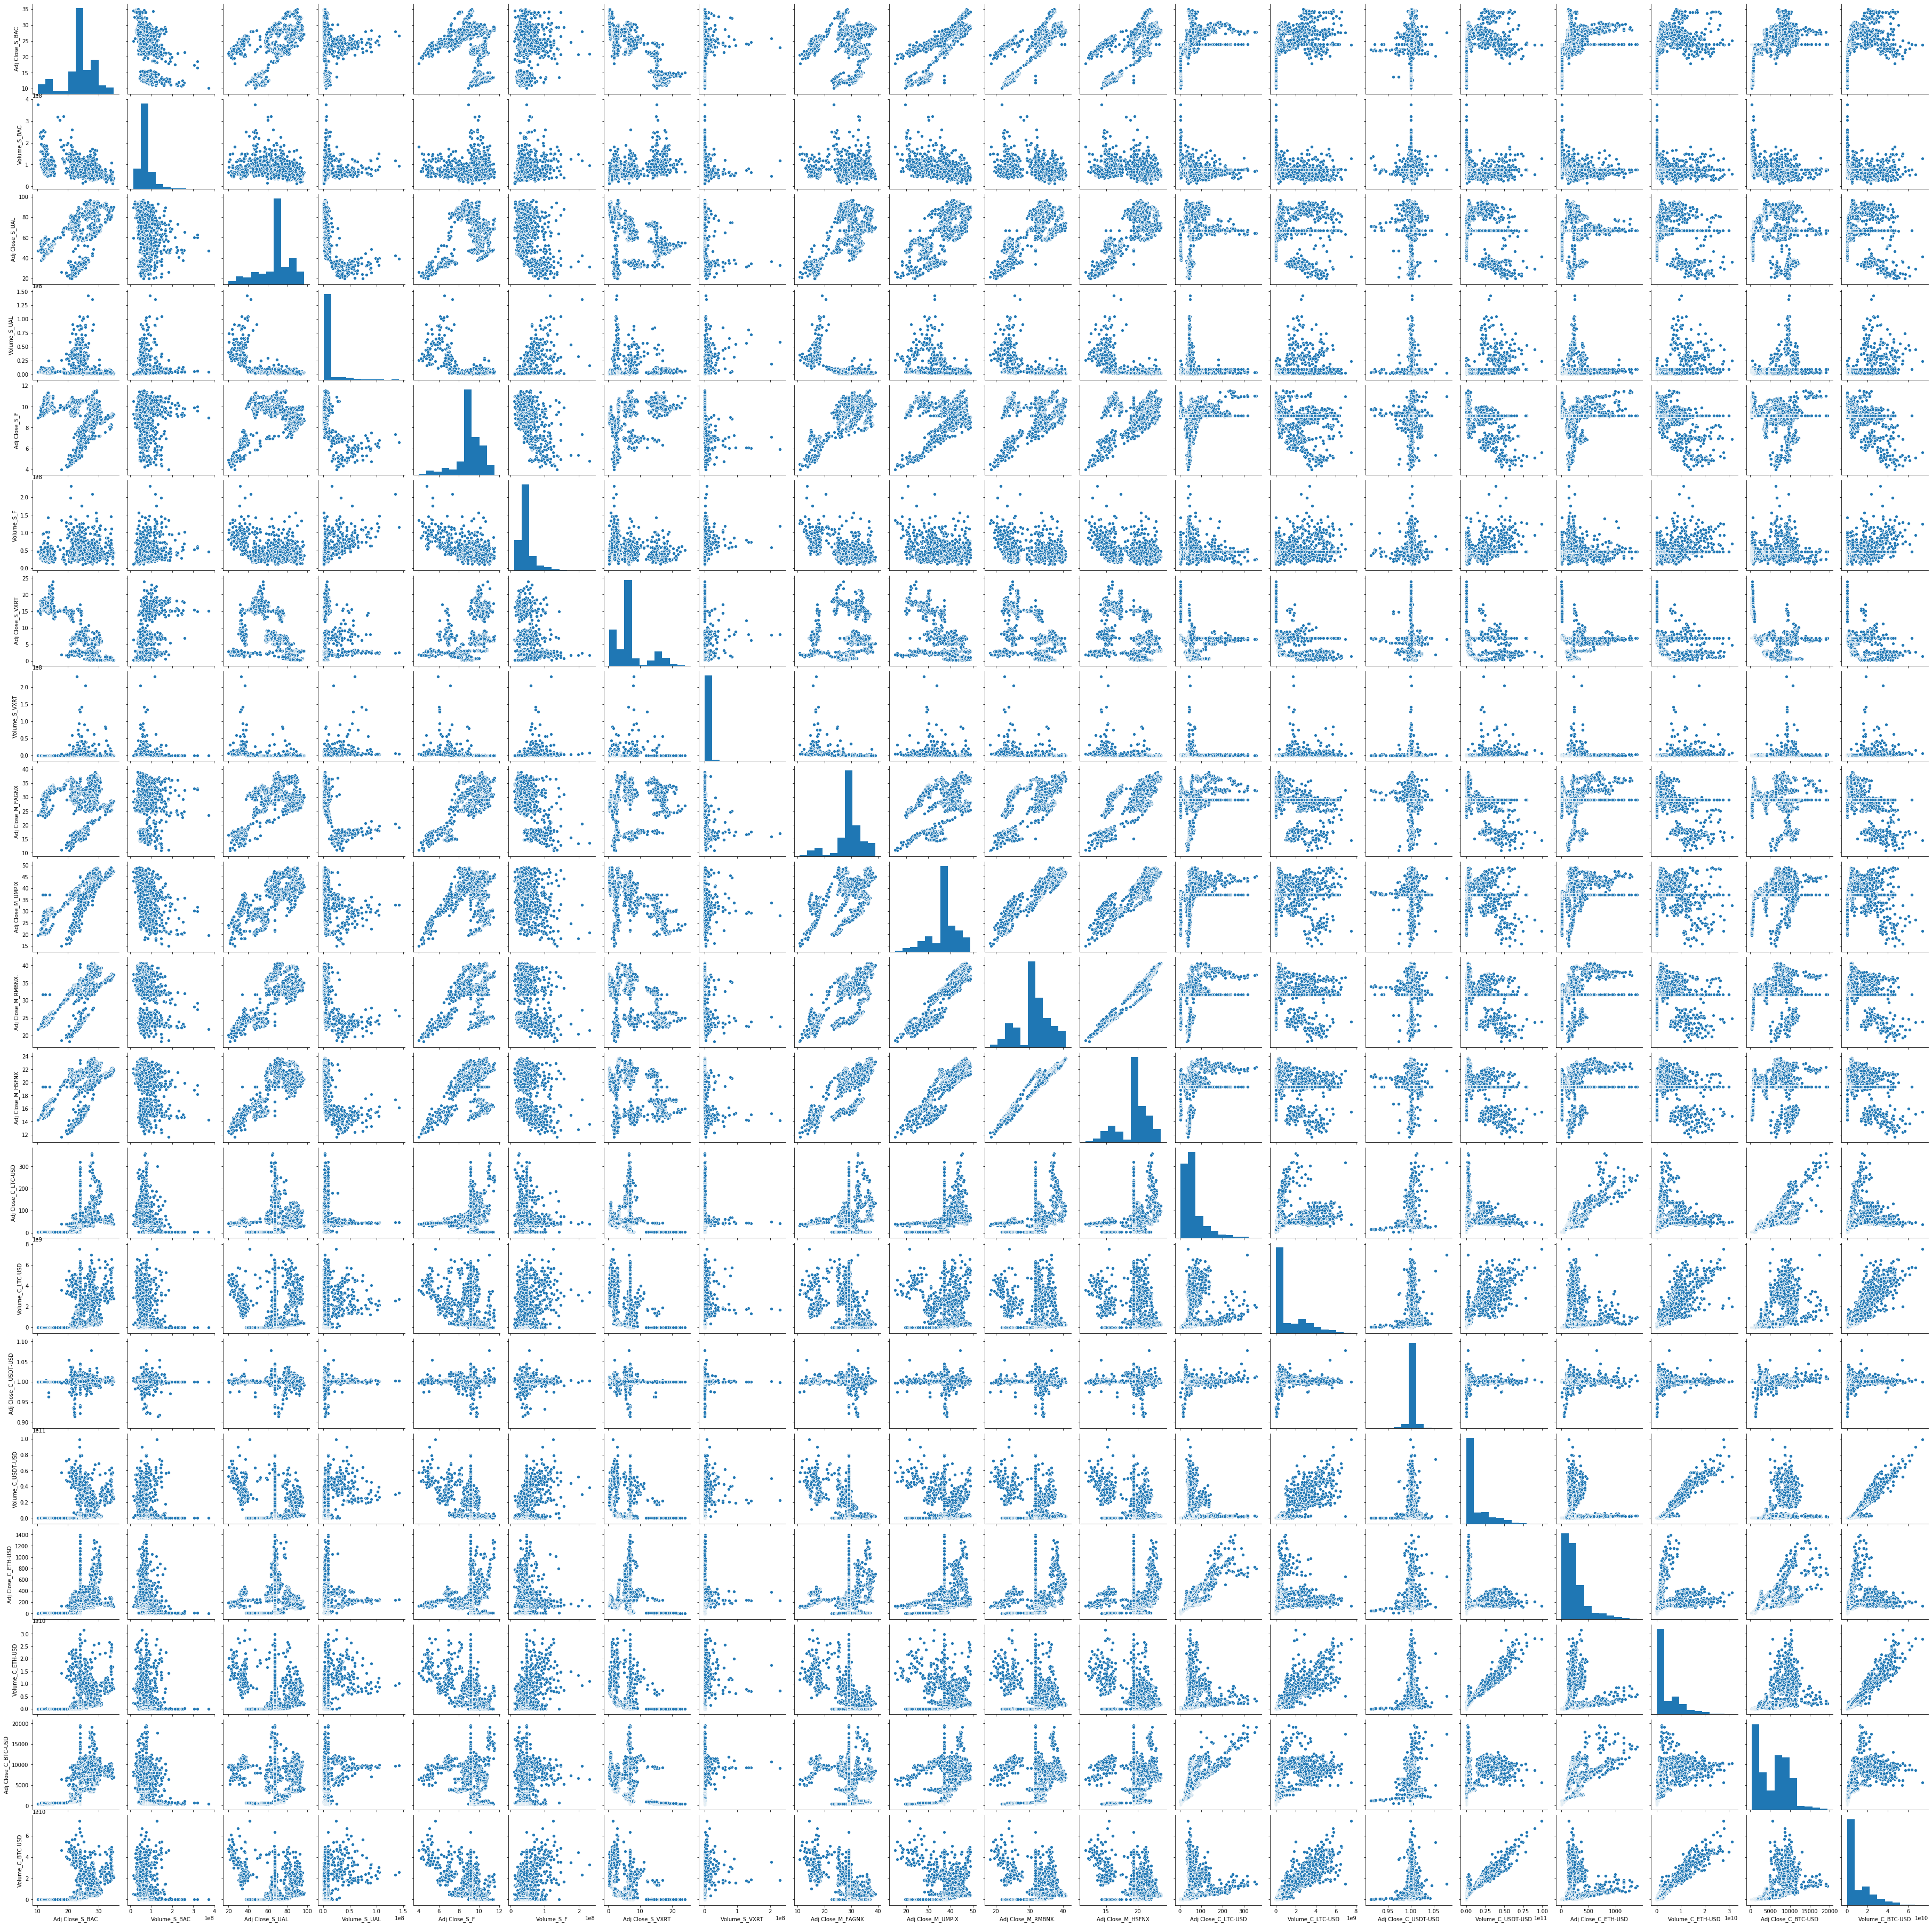

In [26]:
sns.pairplot(SMC)

In [32]:
COR_SMC=SMC.corr()

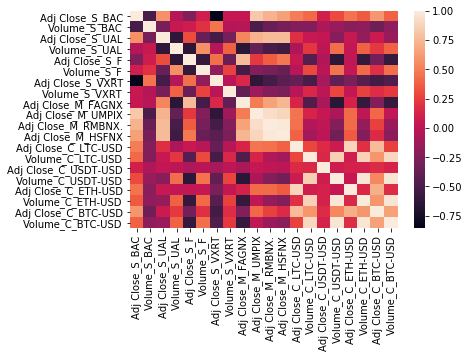

In [30]:
sns.heatmap(COR_SMC)

# SECTION 1 
# Considering only the Adj_Close 

In [36]:
from sklearn import preprocessing
from sklearn import linear_model

In [38]:
#Data Prep

In [39]:
np.random.seed(0)
SMC.shape

(1747, 20)

In [40]:
len(SMC)

1747

In [53]:
numberRows =len(SMC);
randomlyShuffledRows = np.random.permutation(numberRows);
trainingRows = randomlyShuffledRows[0:961];
testRows = randomlyShuffledRows[961:];

traindata=SMC.iloc[trainingRows,0:20];
testdata=SMC.iloc[testRows,0:20];

traindata.shape;
testdata.shape;

In [54]:
traindata.shape

(961, 20)

In [55]:
testdata.shape

(786, 20)

In [56]:
ACtraindata=traindata.loc[:,~traindata.columns.str.contains('Volume_')]
ACtestdata=testdata.loc[:,~testdata.columns.str.contains('Volume_')]

In [57]:
ACtraindata.shape

(961, 12)

In [58]:
ACtestdata.shape

(786, 12)

In [61]:
scaler = preprocessing.StandardScaler()
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)